# Inferential Statistics: t-tests and ANOVA

This notebook guides you through core inferential statistics workflows used in data science and behavioral research:

- Two-sample/paired t-tests (comparing means)
- One-way ANOVA (comparing 3+ group means)
- Factorial (two-way) ANOVA with interaction

**Note:** If you see import errors, ensure the required packages in `requirements.txt` are installed for your environment, do this by running the command: `!pip install -r ../requirements.txt`


 # Practical 1: SAMPLE T TEST  

 This section walks you through running and interpreting a t-test to compare two related sets of measurements.


 ## 1.1 Import necessary libraries

In [9]:
# Import library
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind, ttost_paired
import matplotlib.pyplot as plt
import numpy as np


## 1.2 Enter the dummy data arrays (data_array1, data_array2)   

In [10]:
# Creating data arrays
data_array1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
data_array2 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])


## 1.3 Create a demo visualisation with bar chart of means and error bars   

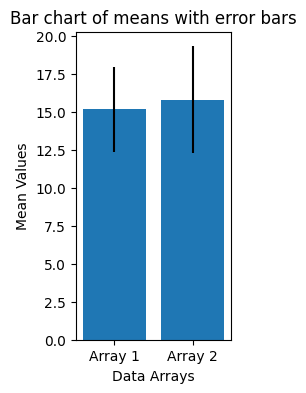

In [11]:
# Calculating means and standard deviations
means = [np.mean(data_array1), np.mean(data_array2)]
std_devs = [np.std(data_array1), np.std(data_array2)]

# Plotting the bar chart with error bars
plt.figure(figsize=(2, 4))
plt.bar(['Array 1', 'Array 2'], means, yerr=std_devs)
plt.xlabel('Data Arrays')
plt.ylabel('Mean Values')
plt.title('Bar chart of means with error bars')
plt.show()

## 1.4 Variance Check  

Note: There are 3 asumptions for T-test/Anova:   
1. Independent samples   
2. Data elements in each dataset follows Normal Distribution or atleast 30 samples needed   
3. **Same Variance (Homegenity Test))**

So, here we check the variance of each data array to se if we are **performing the two sample t-test with equal variances**  

In [12]:
# Print the variance of the arrays (each data group) 
print(np.var(data_array1), np.var(data_array2))


7.727500000000001 12.260000000000002


**Inference:**
Ratio of large dataset variance to small dataset variance less than 4:1 ---> Same Variance (One of the assumptions for T-Test satisfied (Here: 12.26/7.7275 ~ 1.58:1 which is less than 4:1) ). 



## 1.5 T-Test  

Using `SciPy` library for performing a t-test: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)  
<!-- 
2. Using `Statsmodel` package: [https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html) -->

In [13]:
# Perform the two sample t-test with equal variances using SciPy (Scientific Python Library)
result1 = stats.ttest_rel(a=data_array1, b=data_array2)
# Print the result
print(result1)


TtestResult(statistic=np.float64(-1.4675108844031506), pvalue=np.float64(0.15859630923429863), df=np.int64(19))


## Class Task 1 ##

Following the steps above, this time perform a T-test on the data from PPT slide 34 (caffeine vs. without caffeine)    

**T Test:** (Two Sample Method) using Scipy library  


**Step 1:** Manually enter data from slide 34 (caffeine vs. without caffeine) into arrays  

In [6]:
# Put your code here:



**Step 2:** Visualise the data  


In [7]:
# Put your code here:



**Step 3:** Perform T-Tests  


In [8]:
# Put your code here:



**Step 4:** Report the results using the standard notation and interpret.

Report your results and interpret the results here: 

[Double click to change text]


## Practical 2: ONE-SAMPLE ANOVA  

This section introduces one-way ANOVA (“single-factor” ANOVA) for comparing the means of 3 or more independent groups on a single continuous outcome.

When to use
- You have one categorical factor with k ≥ 3 levels (e.g., program, treatment type).
- Outcome is continuous and normally distributed within groups.
- Observations are independent across groups.


## 2.1 Entering dataset and visualise it

This is a mock-up dataset of students' performance in CCI:

In [15]:
# Performance of students based on attendance among 4 disciplines
BSCDSAI = [89, 89, 88, 78, 79]
BSCCS = [93, 92, 94, 89, 88]
MSCDSAI= [89, 88, 89, 93, 90]
MSCCS = [81, 78, 81, 92, 82]

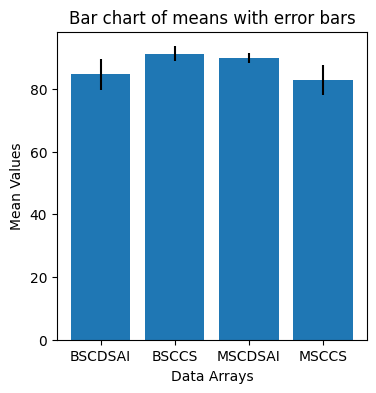

In [16]:
# Calculating means and standard deviations
means = [np.mean(BSCDSAI), np.mean(BSCCS), np.mean(MSCDSAI), np.mean(MSCCS)]
std_devs = [np.std(BSCDSAI), np.std(BSCCS), np.std(MSCDSAI), np.std(MSCCS)]

# Plotting the bar chart with error bars
plt.figure(figsize=(4, 4))
plt.bar(['BSCDSAI', 'BSCCS', 'MSCDSAI', 'MSCCS'], means, yerr=std_devs)
plt.xlabel('Data Arrays')
plt.ylabel('Mean Values')
plt.title('Bar chart of means with error bars')
plt.show()

## 2.2 Conduct the one-way ANOVA

In [18]:
# Conduct the one-way ANOVA
stats.f_oneway(BSCDSAI,BSCCS,MSCDSAI,MSCCS)


F_onewayResult(statistic=np.float64(4.625), pvalue=np.float64(0.01633645983978024))

Inference: `pvalue .01 < 0.5`, Hence Reject Null Hypothesis,   
Thus there is evidence of improvement in student performance on regular attendence in class

## F statistic calculation  

In one-way ANOVA, the F statistic compares **variance explained by the model** (differences between group means, i.e., how far each group’s average is from the overall grand mean) to **unexplained variance** (differences within groups, i.e., how much individual observations vary around their own group’s mean).

**Step 1 - Model sum of squares**: how much variance is explained by the differences between groups (i.e., difference between each group mean and the grand mean, square them, multiply count, sum)

In [ ]:
group_a = np.array([3, 5, 4, 4, 2])
group_b = np.array([2, 3, 2, 1])
group_c = np.array([5, 6, 4, 6])

In [ ]:
grand_mean = np.concatenate((group_a,group_b,group_c)).mean()
print(f'grand mean: {grand_mean}')

In [ ]:
model_square_a = (group_a.mean() - grand_mean)**2*len(group_a)
model_square_b = (group_b.mean() - grand_mean)**2*len(group_b)
model_square_c = (group_c.mean() - grand_mean)**2*len(group_c)

In [ ]:
ssm = model_square_a + model_square_b + model_square_c
print(f'Model sum of squares (SSM): {ssm:.2f}')

**Step 2 - Residual sum of squares**: difference between the group means and the individual data points, squared and summed

In [ ]:
residual_square_a = (group_a - group_a.mean())**2
residual_square_b = (group_b - group_b.mean())**2
residual_square_c = (group_c - group_c.mean())**2

In [ ]:
ssr = residual_square_a.sum() + residual_square_b.sum() + residual_square_c.sum()
print(f'Residual sum of squares (SSR): {ssr}')

**Step 3 - Variation explained by model / Residual variation**:

In [ ]:
# Total Degrees of Freedom
dft = len(group_a)+len(group_b)+len(group_c) - 1
# Model Degrees of Freedom
dfm = 3 - 1 
# Residuals Degrees of Freedom
dfr = dft - dfm

In [ ]:
# Variation explained by model
msm = ssm/dfm
print(f'Variation explained by model: {msm}')

In [ ]:
# Residual variation
msr = ssr/dfr
print(f'Residual variation: {msr}')

In [ ]:
# F (2,10)= MSM / MSR (variance)
f = msm / msr
print(f'F(2,10) value: {f}')

Look up critical F value for p=.05 with $df_R$ and $df_M$. Here is a example lookup table: [https://users.sussex.ac.uk/~grahamh/RM1web/F-ratio%20table%202005.pdf](https://users.sussex.ac.uk/~grahamh/RM1web/F-ratio%20table%202005.pdf)  

![img](critical_f_005.png)

We notice that our `F > 4.10` Hence Significant `p < .05`

## Class Task 2  

Following the steps in **Practical 2: ONE-SAMPLE ANOVA**, perform an one-way ANOVA using the data in PPT slide 47 (GroupA, GroupB and GroupC)


**Step 1:** Create Data for the values in PPT slide 47 (GroupA, GroupB and GroupC) using List 


In [ ]:
# Put your code here:



**Step 2:** Visualise data  

In [ ]:
# Put your code here:



**Step 3:** Perform One way ANOVA  

In [ ]:
# Put your code here:



**Step 4:** Report the ANOVA using the standard notation and interpret

Report your results and interpret the results here:


## Practical 3: Factorial ANOVA  

This section introduces two-way (factorial) ANOVA to test:
- Main effects: whether each factor, by itself, has a mean effect on the outcome.
- Interaction: whether the effect of one factor depends on the level of the other factor.


**Story line:** Steps to perform a two-way ANOVA to determine if drinking water habits and intensity of exercises have a significant effect on child growth, and to determine if there is any interaction effect between drinking water habits and intensity of exercises

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
# create a mock-up data
df = pd.DataFrame({'Drink_Water': np.repeat(['once_3hours', 'once_6hours'], 15),
                   'Exercises': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'Growth': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})


In [24]:
#view first ten rows of data 
df[:10]

,Drink_Water,Exercises,Growth
0,once_3hours,low,6
1,once_3hours,low,6
2,once_3hours,low,6
3,once_3hours,low,5
4,once_3hours,low,6
5,once_3hours,med,5
6,once_3hours,med,5
7,once_3hours,med,6
8,once_3hours,med,4
9,once_3hours,med,5


In [26]:
#perform two-way ANOVA
model = ols('Growth ~ C(Drink_Water) + C(Exercises) + C(Drink_Water):C(Exercises)', data=df).fit()

sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(Drink_Water),8.533333,1.0,16.0000,0.000527
C(Exercises),24.866667,2.0,23.3125,0.000002
C(Drink_Water):C(Exercises),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


Since the p-values for `Drink_Water` and `Exercises` are both less than .05 (0.000527 and 0.000002 respectively), this means that both factors have a statistically significant effect on child `Growth`.  
But, p-value for the interaction effect (.120667) is not less than .05, this tells us that there is no significant interaction effect between Drinking water habits and Exercises.
 
Note: Although the ANOVA results tell us that drinking water habits and exercises have a statistically significant effect on child `Growth`, we would need to perform post-hoc tests to determine exactly how different Drinking water habits and Exercise intensity affect child `Growth`.


## Class Task 3   

**Data:** In PPT slide 67 (they're in the [`therapy_dose.csv`](therapy_dose.csv) file), there's a mock-up dataset from a panic therapy study (see explanations in slides 64-66).  
**Task:** Following the steps in **Practical 3**, perform a Factorial ANOVA to investigate the effects of 3 kinds of therapy on experienced panic symptoms, and whether the therapy interacts with drug dose (3 levels) in determining panic symptoms.


**Step 1:** Load data from the [`therapy_dose.csv`](therapy_dose.csv) file.  
> Hint: Look at last week's notebook for how to load `.csv` file into Python dataframe `df`

In [ ]:
# Put your code here:


**Step 2:** Perform Factorial ANOVA based on the model above

In [ ]:
# Put your code here:


**Step 3:** Report the ANOVA using the standard notation and interpre

Report your results and interpret the results here:
